# Foreword

The intention of this project is providing a thorough analysis of a dataset regarding it-related job offerings, where we analyse relevant aspects such as the job title, location and gross average salary. 

Due to time constraints, and the technical difficulties encountered in previous web scraping attempts, it has been withdrawn the option to scrap data from infojobs, since the general T&C of the website do not allow for web scrapping, plus, they have controls in place to block any web scrapping action. 

We insted take the data from a .csv dataset obtained from kaggle, whose link is provided in the initial section. 

1. the project consists of an analysis of IT industry job openings from a kaggle datasets that has a sample size of 3,755 elements
2. we provide information on the gross salary, irrespective of other benefits (contributions to pensions schema, health insurance, travel allowances, etc.)
3. we do not take into account the inflation effect / consumer price index (6,1% in the Eurozone as of June 2023) 
4. this dataset provides information as of April 2023 

Sources: digitalocean.com, kaggle, datacamp, geeks for geeks, eurostat, medium.com, towardsdatascience.com, educative.io, appsloveworld, datatechnotes

# Dataset 

# 1. Read the data

Data source: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [2]:
import pandas as pd                   
import numpy as np   

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
init_dataset = pd.read_csv('ds_salaries (1).csv')
init_dataset.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [46]:
columns_to_drop = ['work_year', 'salary', 'salary_currency', 'employee_residence']
dataset = init_dataset.drop(columns=columns_to_drop)

In [47]:
dataset.head()

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,SE,FT,Principal Data Scientist,85847,100,ES,L
1,MI,CT,ML Engineer,30000,100,US,S
2,MI,CT,ML Engineer,25500,100,US,S
3,SE,FT,Data Scientist,175000,100,CA,M
4,SE,FT,Data Scientist,120000,100,CA,M


In [48]:
print(dataset['experience_level'].unique())

['SE' 'MI' 'EN' 'EX']


In [49]:
print(dataset['employment_type'].unique())

['FT' 'CT' 'FL' 'PT']


In [52]:
print(dataset['job_title'].unique())

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engine

In [53]:
dataset['job_title'].nunique()

93

In [54]:
print(dataset['remote_ratio'].unique())

[100   0  50]


In [55]:
print(dataset['company_location'].unique())

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [56]:
dataset['company_location'].nunique()

72

Some previous considerations regarding some variables: 

1. work_year might be treated as a categorical variable; it might be also helpful in order to provide the plot for the categoricals

2. remote_ration indicates the proportion of the time (in %) that the work is performed remotely, we could also treat it as a categorical o as a numerical divided by 100

3. it might be interesting to find as well some outliers, in particular, when dealing with large vs. small companies, experience level entry level vs. management position 

4. also in salary figures per se we might identify some outliers 

# 2. Exploratory data analysis 

In [57]:
dataset.shape

(3755, 7)

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3755 non-null   object
 1   employment_type   3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [59]:
print(dataset.isnull().sum())

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64


We have a dataset with 3,755 elements and none of them are null 

# Get num and cat variables 

In [60]:
num = dataset.select_dtypes(include=np.number)
num

,salary_in_usd,remote_ratio
0,85847,100
1,30000,100
2,25500,100
3,175000,100
4,120000,100
...,...,...
3750,412000,100
3751,151000,100
3752,105000,100
3753,100000,100


In [61]:
cat = dataset.select_dtypes(include=np.object)
cat

C:\Users\ruizg\AppData\Local\Temp\ipykernel_26212\1892227502.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = dataset.select_dtypes(include=np.object)


,experience_level,employment_type,job_title,company_location,company_size
0,SE,FT,Principal Data Scientist,ES,L
1,MI,CT,ML Engineer,US,S
2,MI,CT,ML Engineer,US,S
3,SE,FT,Data Scientist,CA,M
4,SE,FT,Data Scientist,CA,M
...,...,...,...,...,...
3750,SE,FT,Data Scientist,US,L
3751,MI,FT,Principal Data Scientist,US,L
3752,EN,FT,Data Scientist,US,S
3753,EN,CT,Business Data Analyst,US,L


# Get unique values 

We count the number of roles and locations that we have 

# 4. Descriptive statistics 

We provide sns countplots to get an idea of hoe certain values are distributed in the dataset, including work year, experience level, employment type and company size, however, this information will be analysed in more detail with Tableau data visualisation 

In [62]:
dataset.describe()

,salary_in_usd,remote_ratio
count,3755.000000,3755.000000
mean,137570.389880,46.271638
std,63055.625278,48.589050
min,5132.000000,0.000000
25%,95000.000000,0.000000
50%,135000.000000,0.000000
75%,175000.000000,100.000000
max,450000.000000,100.000000


Create plot for each of the variables 

We provide a countplot for categorical variables, we do it initially with a for loop, just to get an overview, and then we do it individually to provide a detailed description of the selected charts to get a better data interpretation from a cleaner graph. 

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

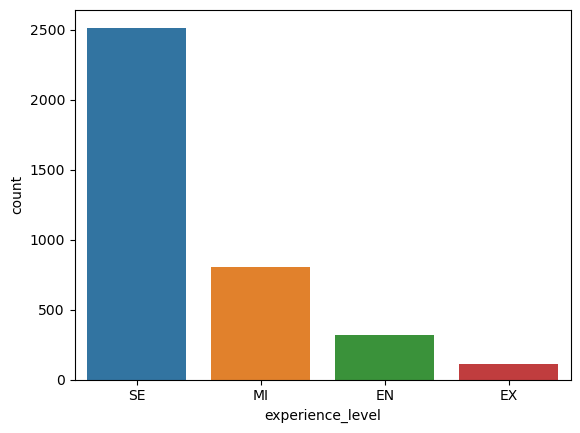

In [63]:
sns.countplot(dataset['experience_level']).unique()

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

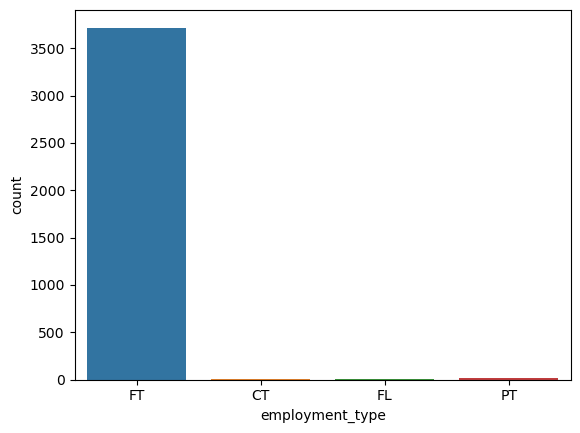

In [64]:
sns.countplot(dataset['employment_type']).unique()

C:\Users\ruizg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

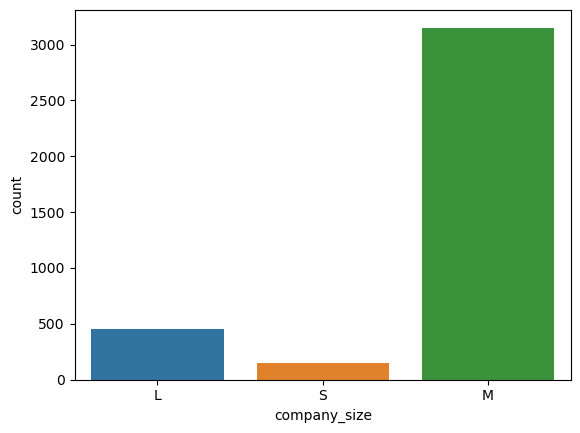

In [65]:
sns.countplot(dataset['company_size']).unique()

We see that 'medium' companies account for the majority of employers in the dataset, we might find some outliers from large and small companies

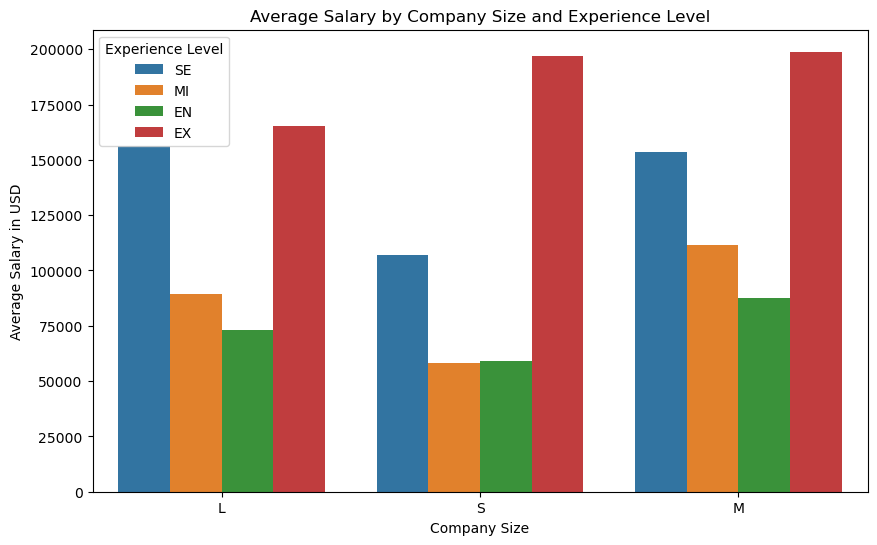

In [66]:
average_salary = dataset.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='company_size', y='salary_in_usd', hue='experience_level', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Company Size and Experience Level')
plt.legend(title='Experience Level')
plt.show()

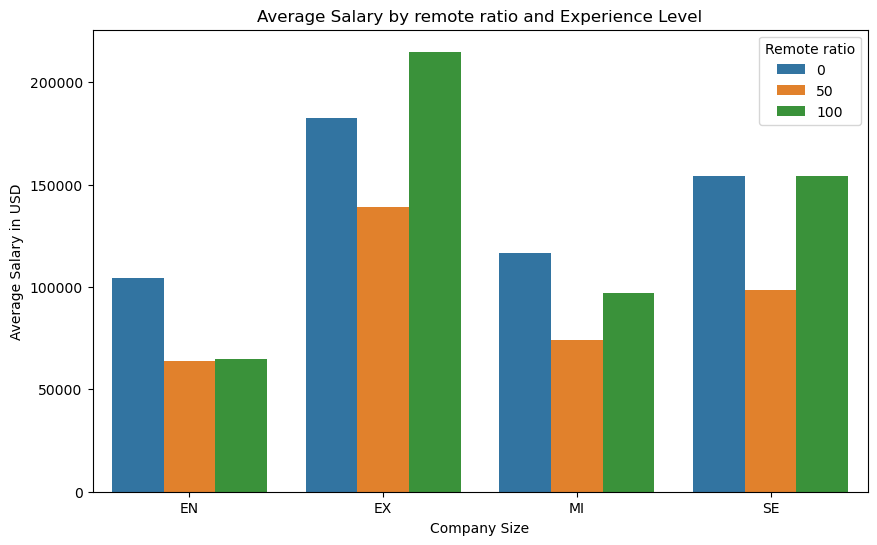

In [67]:
average_salary = dataset.groupby(['remote_ratio', 'experience_level'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary, x='experience_level', y='salary_in_usd', hue='remote_ratio', ci=None)
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by remote ratio and Experience Level')
plt.legend(title='Remote ratio')
plt.show()

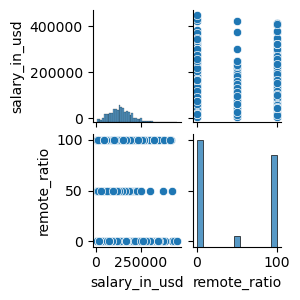

In [68]:
sns.pairplot(dataset, height=1.5)

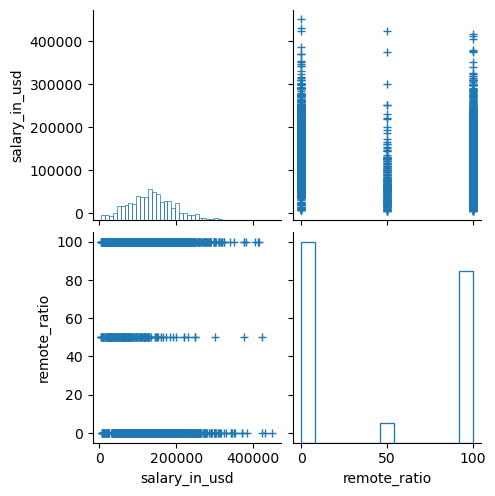

In [69]:
sns.pairplot(
    dataset,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [70]:
dataset.corr()

,salary_in_usd,remote_ratio
salary_in_usd,1.000000,-0.064171
remote_ratio,-0.064171,1.000000


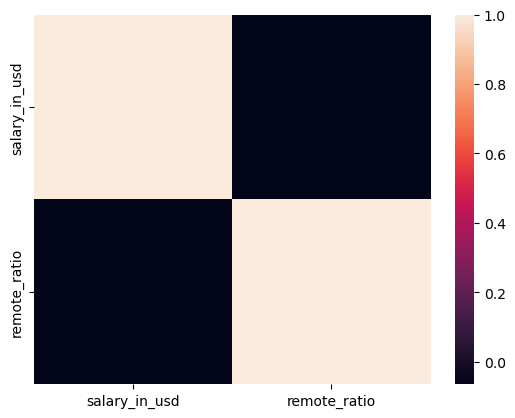

In [71]:
sns.heatmap(dataset.corr());

# Ideas for sql querying

Eventhough we are going to be dealing with this in the corresponding section of the project, we provide an advance of some sql queries that we may perform once we create the sql db from the dataset being analysed

1. calculate the average gross salary, in usd, for middle and senior experience level
2. calculate the average gross salary for a Data Scientist and a Machine Learning Engineer 
3. calculate the average gross salary for a Deep Learning Engineer in the US 
4. calculate the average gross salary for a Machine Learning Engineer in Spain in 2022 

# Machine learning modelling 

# train-test 

1. Define target and predictors 

Based on the dataset info, we define the variables that we are going to use as predictors 

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  3755 non-null   object
 1   employment_type   3755 non-null   object
 2   job_title         3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_location  3755 non-null   object
 6   company_size      3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


2. ml model and train-test split 

In [73]:
# define target and predictors 
target_variable = 'salary_in_usd'
predictor_variables = ['experience_level', 'employment_type', 'company_location', 'remote_ratio', 'company_size']

# create variables vector 
X = dataset[predictor_variables]
y = dataset[target_variable]

# perform one-hot encoding on categoricals 
X = pd.get_dummies(X)

# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

3. model accuracy evaluation 

Evaluate the model usingthe main regression accuracy measures (MAE, MSE, RMSE, R-Squared)

In [74]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 266383611609.81592
Mean Squared Error (MSE): 1.3322793390603987e+25
Root Mean Squared Error (RMSE): 3650040190272.4287
R-squared (R^2): -3374747376620871.5


MAE, MSE, RMSE, R-Squared

ValueError: Could not interpret input 'salary'

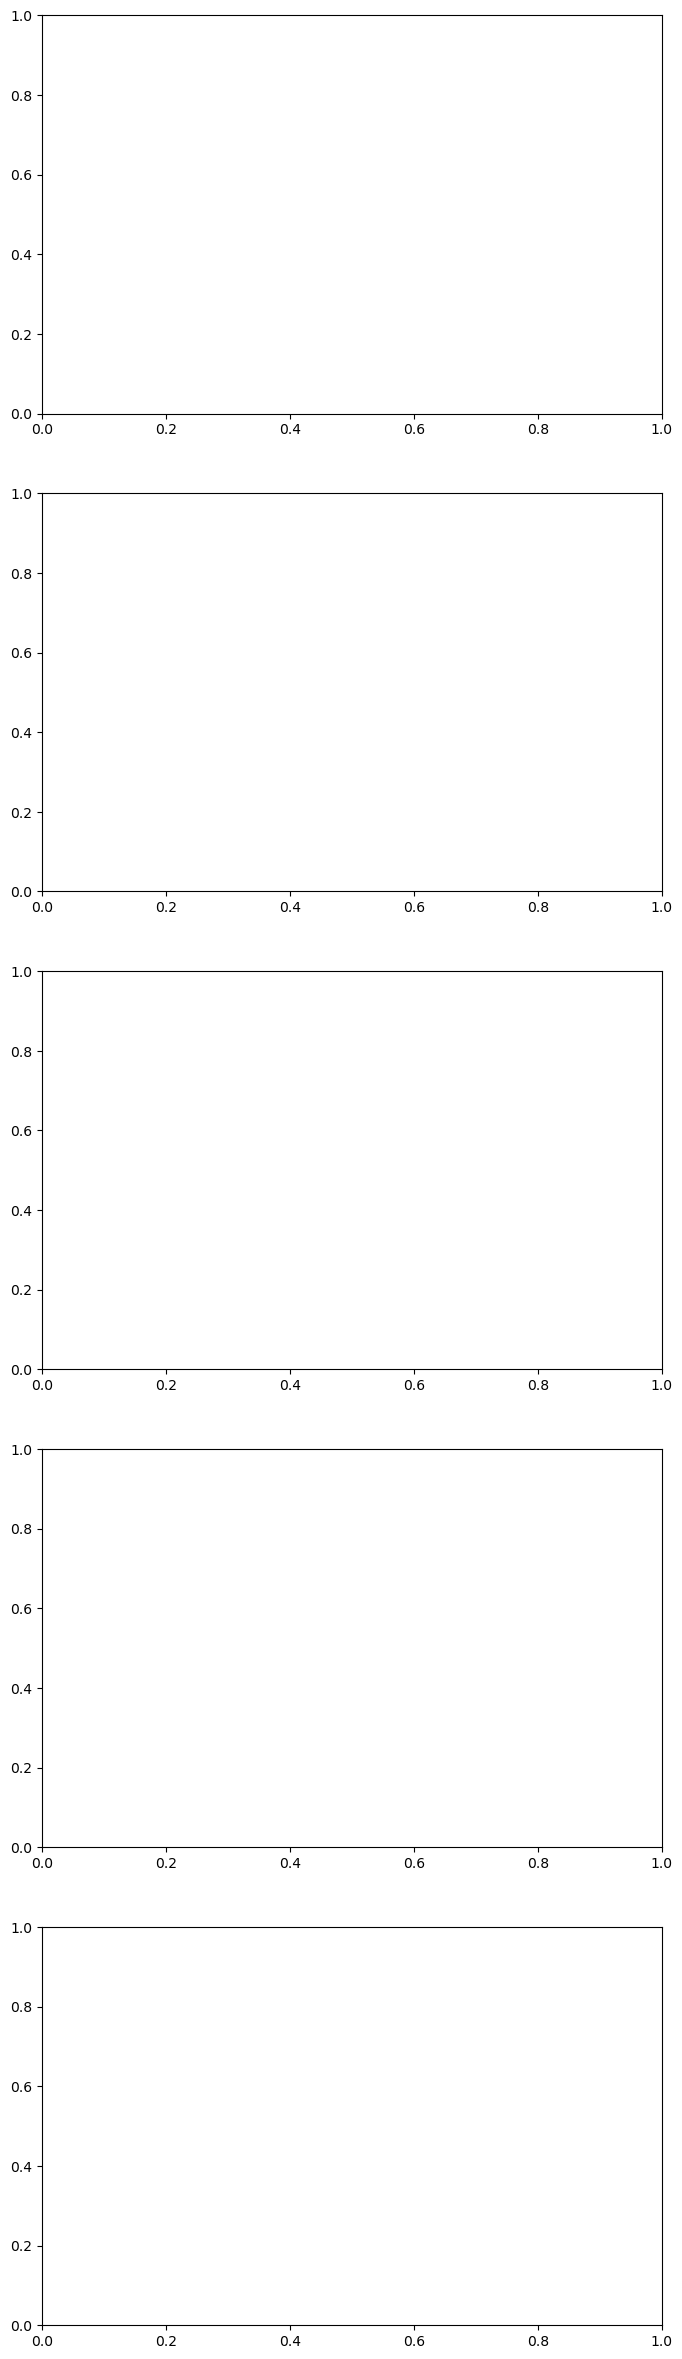

In [75]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Salary')
    axes[i].set_title('Salary Distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [76]:
# Apply min-max scaling to the predictor variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [77]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 2289372588029860.5
Mean Squared Error (MSE): 9.840438033269771e+32
Root Mean Squared Error (RMSE): 3.136947247447711e+16
R-squared (R^2): -2.4926448578717988e+23


ValueError: Could not interpret input 'salary'

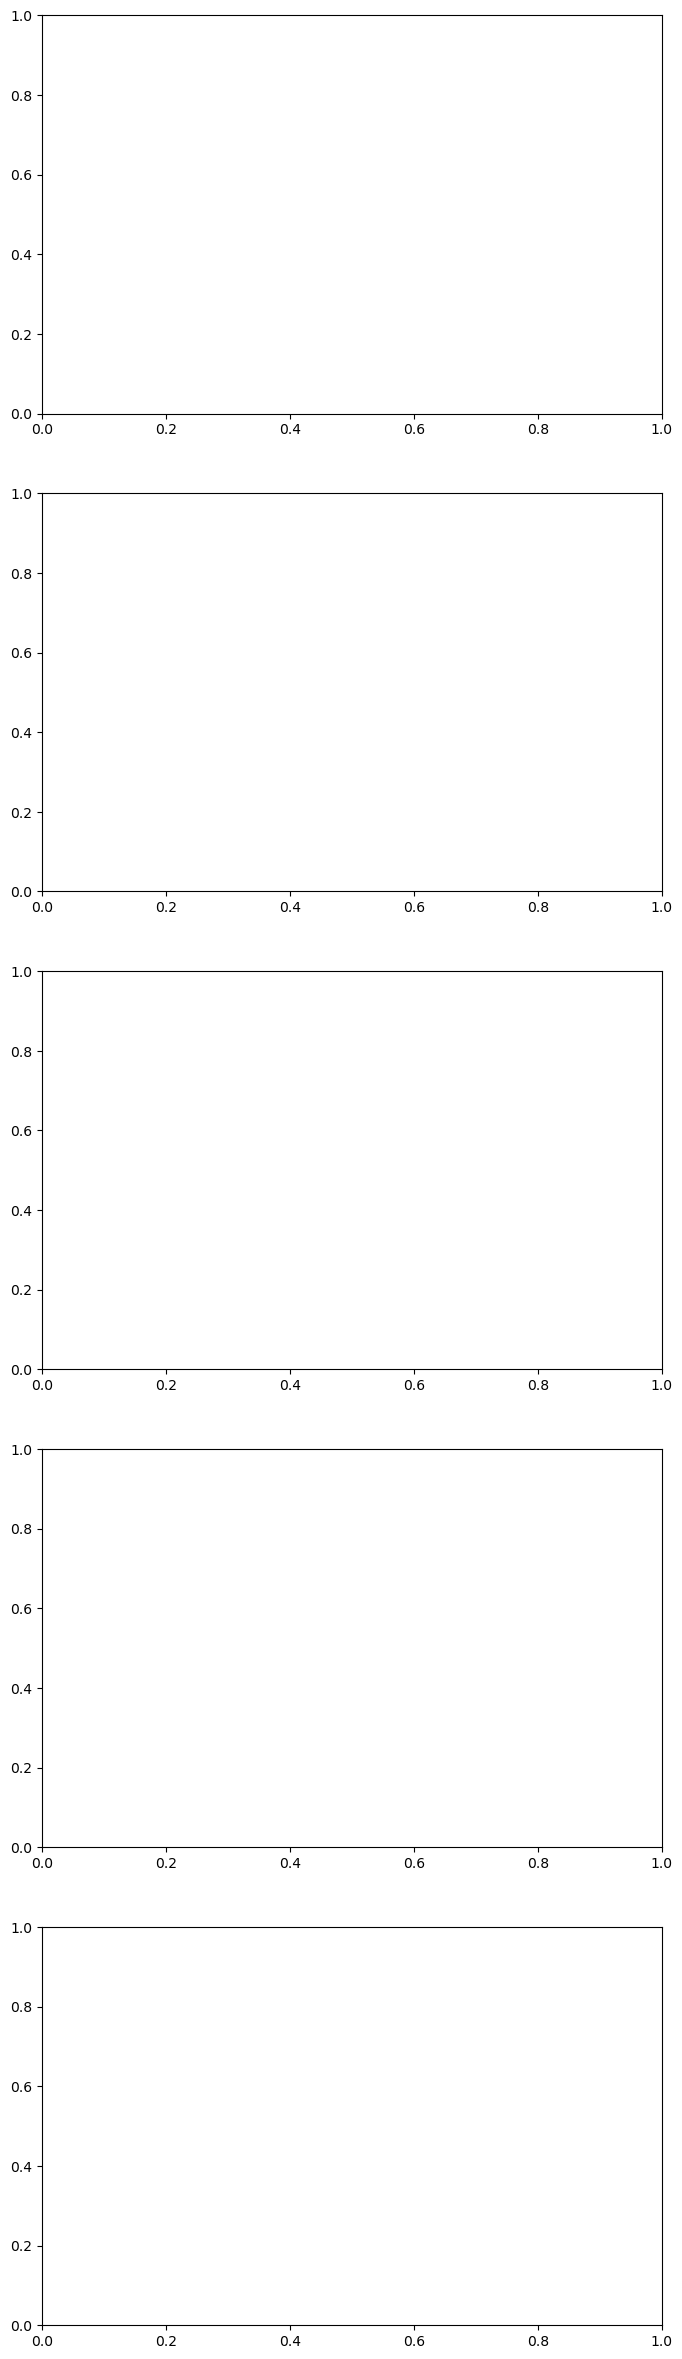

In [78]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Salary')
    axes[i].set_title('Salary Distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Apply normalization to the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 2289372588029860.5
Mean Squared Error (MSE): 9.840438033269771e+32
Root Mean Squared Error (RMSE): 3.136947247447711e+16
R-squared (R^2): -2.4926448578717988e+23


# Scenario 2: 'salary_in_usd' as target variable 

In [ ]:
# define target and predictors 
target_variable = 'salary_in_usd'
predictor_variables = ['experience_level', 'employment_type', 'employee_residence', 'remote_ratio', 'company_size']

# create variables vector 
X = dataset[predictor_variables]
y = dataset[target_variable]

# perform one-hot encoding on categoricals 
X = pd.get_dummies(X)

# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

In [ ]:
# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), figsize=(8, 6 * len(predictor_variables)))

# Create box plots for each predictor variable
for i, variable in enumerate(predictor_variables):
    sns.boxplot(x=variable, y='salary_in_usd', data=dataset, ax=axes[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('salary in usd')
    axes[i].set_title('salary in usd distribution by ' + variable)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Apply min-max scaling to the predictor variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

In [ ]:
# Apply normalization to the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

# Model performance issues

Some steps that we could take to improve the overall performance of the model include:
1. feature engineering 
2. Hyperparam. tunning
3. Cross-valitation 

# Data imbalance: oversampling and undersampling 